# Individual Assignment 1: ML Modeling Refresh (Spring 2024)


**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Full Name: Adam Syed
* Student ID (7 digit number): 2735566

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero. This is a dataset on annual earnings (y) as a function of geographic and economic predictors.

**10 points each. 100 points**

  Use the file below to complete the following data wrangling and regression modeling. Good luck!


# Read the data

For some reason, gdown has recently been giving me issues - so here you can download and drag the file into your runtime.

Here is the link for:
* X_S24.csv = 'https://drive.google.com/file/d/10yZr6nZA1BV1Kp4C6UtLMKfynqFSPDY6/view?usp=drive_link'
* y_S24.csv = 'https://drive.google.com/file/d/1UXXQ_qr-vWg5RJTfSD5ESSc5Yeaev_1f/view?usp=drive_link'

# Q1. Explore the dataset
Get to know this new dataset! How many rows and columns are there? What are the data types of the columns in X (string vs numeric)? Are there any missing values?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#from google.colab import drive
#drive.mount('/content/drive')

X_data = pd.read_csv('/Users/adamyeeter/OPIM 5509 Deep Learning/X_S24.csv')
y_data = pd.read_csv('/Users/adamyeeter/OPIM 5509 Deep Learning/y_S24.csv')

In [2]:
X_data.head()

,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
0,-0.488983,-0.650489,1.188653,-0.424041,0.126153,0.079847,0.615604,-0.387655,0.172021,-0.071714
1,0.857803,-0.744886,0.012302,-0.603159,0.450438,-2.208105,-1.536246,0.659717,1.049996,-1.642319
2,1.504650,-1.542571,-1.429606,-0.184382,0.008916,-0.122821,-1.013401,-0.029866,-0.396784,2.152012
3,-0.636917,-0.639321,-0.569536,-0.050816,-0.547571,2.037834,0.100880,0.120171,0.125213,-0.622810
4,2.099281,0.244244,-0.314890,0.740922,-0.419488,1.010743,-0.064267,0.455424,-0.970213,-0.961485


In [3]:
y_data.head()

,Annual Earnings
0,61.864768
1,0.000000
2,0.000000
3,68.108952
4,230.784497


In [4]:
X_data.shape

(5000, 10)

In [5]:
y_data.shape

(5000, 1)

In [6]:
X_data.columns

Index(['State Score', 'Education Score', 'Geography Score', 'Age (normalized)',
       'Career Advancement Opportunity Score', 'Job Satisfaction Score',
       'Health and Wellness Program Quality Score', 'Job Demand Score',
       'Work Experience (normalized)', 'Company Size (normalized)'],
      dtype='object')

In [7]:
y_data.columns

Index(['Annual Earnings'], dtype='object')

In [8]:
X_data.dtypes

State Score                                  float64
Education Score                              float64
Geography Score                              float64
Age (normalized)                             float64
Career Advancement Opportunity Score         float64
Job Satisfaction Score                       float64
Health and Wellness Program Quality Score    float64
Job Demand Score                             float64
Work Experience (normalized)                 float64
Company Size (normalized)                    float64
dtype: object

In [9]:
y_data.dtypes

Annual Earnings    float64
dtype: object

In [10]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State Score                                5000 non-null   float64
 1   Education Score                            5000 non-null   float64
 2   Geography Score                            5000 non-null   float64
 3   Age (normalized)                           5000 non-null   float64
 4   Career Advancement Opportunity Score       5000 non-null   float64
 5   Job Satisfaction Score                     5000 non-null   float64
 6   Health and Wellness Program Quality Score  5000 non-null   float64
 7   Job Demand Score                           5000 non-null   float64
 8   Work Experience (normalized)               5000 non-null   float64
 9   Company Size (normalized)                  5000 non-null   float64
dtypes: float64(10)
memory us

In [11]:
y_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual Earnings  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [12]:
X_data.isnull().sum().sum()

0

In [13]:
y_data.isnull().sum().sum()

0

In [14]:
X_data.isnull().sum()

State Score                                  0
Education Score                              0
Geography Score                              0
Age (normalized)                             0
Career Advancement Opportunity Score         0
Job Satisfaction Score                       0
Health and Wellness Program Quality Score    0
Job Demand Score                             0
Work Experience (normalized)                 0
Company Size (normalized)                    0
dtype: int64

In [15]:
y_data.isnull().sum()

Annual Earnings    0
dtype: int64

# Q2. Split into X_train, X_test, y_train, y_test.
Before we do any cleaning, let's split the data so that we can use fit_transform() on train and transform() on test. Use an 80/20 split, shuffle the data, and random state equal to **YOUR STUDENT ID**. Print the shape of X_train, X_test, y_train, y_test and make sure it makes sense to you.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=2735566)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 10)
X_test shape: (1000, 10)
y_train shape: (4000, 1)
y_test shape: (1000, 1)


In [17]:
X_trainarray = np.array(X_train)
X_testarray = np.array(X_test)
y_trainarray = np.array(y_train)
y_testarray = np.array(y_test)

# Q3. Clean up the dataset.
Use your judgement on if any rows should be deleted - there are missing values in every column in X that need to get replaced!

Right now X and y are in different files, so be careful if you are dropping rows.

In [18]:
missing_values_X = X_data.isnull().sum()
print("Missing values in each column of X:")
print(missing_values_X)

Missing values in each column of X:
State Score                                  0
Education Score                              0
Geography Score                              0
Age (normalized)                             0
Career Advancement Opportunity Score         0
Job Satisfaction Score                       0
Health and Wellness Program Quality Score    0
Job Demand Score                             0
Work Experience (normalized)                 0
Company Size (normalized)                    0
dtype: int64


In [19]:
missing_values_y = y_data.isnull().sum()
print("Missing values in each column of y:")
print(missing_values_y)

Missing values in each column of y:
Annual Earnings    0
dtype: int64


# Q4. Make three EDA plots and three EDA tables using X_train and y_train

In [20]:
X_train.describe()

,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.036950,0.008732,0.012255,0.006052,0.007936,0.018291,-0.003228,-0.009985,0.023697,-0.018388
std,1.014100,0.992473,0.980554,0.994936,0.998398,1.015717,1.021185,1.003776,0.984419,1.013441
min,-3.581230,-3.696449,-4.199683,-3.429597,-3.713290,-3.618401,-3.192101,-3.838710,-3.611576,-4.088482
25%,-0.715623,-0.644217,-0.648693,-0.660273,-0.668762,-0.689390,-0.685387,-0.677452,-0.631700,-0.683408
50%,-0.035511,-0.004810,-0.003538,-0.006356,0.011601,0.029850,0.019257,-0.011117,0.027999,-0.029915
75%,0.614576,0.682445,0.675931,0.668991,0.674461,0.691592,0.680774,0.671850,0.690594,0.657106
max,3.561219,3.877207,3.248400,3.649854,3.609161,3.738425,3.595347,3.847528,3.693792,3.361579


In [21]:
X_train['FLAG_Education_Score'] = np.where(X_train['Education Score'] <= np.mean(X_train['Education Score']), 0, 1)
print('The mean of Education Score is:', X_train['Education Score'].mean())
X_train.head()

The mean of Education Score is: 0.008731750319919504


,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized),FLAG_Education_Score
2768,0.744545,-0.578401,0.822373,-0.491567,-1.041920,0.483266,0.011043,0.684851,0.326869,1.609581,0
1838,-0.369493,0.123641,-0.594391,-0.065382,-0.352254,0.872039,1.539660,0.076103,0.271305,-1.211328,1
2992,0.571744,1.294321,0.061651,-0.126977,-1.016084,0.539455,1.450082,-0.252395,0.599954,-0.726527,1
1416,2.033195,1.328457,1.253119,1.367087,0.116159,-0.431614,-0.151810,0.804145,0.330454,-0.114935,1
3995,-0.087200,-0.869957,-0.650750,1.893696,1.102995,0.372214,0.182099,0.904566,1.948616,0.715928,0


In [22]:
X_test['FLAG_Education_Score'] = np.where(X_test['Education Score'] <= np.mean(X_test['Education Score']), 0, 1)
print('The mean of Education Score is:', X_test['Education Score'].mean())
X_test.head()

The mean of Education Score is: 0.056277819853161506


,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized),FLAG_Education_Score
3078,2.514075,-0.362183,1.249381,-1.142959,-0.288399,0.240744,0.819014,-0.597821,1.104677,-0.755116,0
1037,1.827359,-0.637359,-0.912645,-0.064079,-0.611538,1.428190,1.197632,-0.073520,-0.184356,1.106622,0
4085,0.832018,-1.153270,-1.210359,1.605440,-0.368375,1.045971,0.850966,1.542045,-0.772796,-0.029135,0
596,-0.491529,0.841019,0.661010,0.191523,2.502879,0.423596,-0.311090,-0.421962,-1.378429,-0.027582,1
4650,-1.165778,-1.825191,-1.061272,-0.773544,0.968562,-0.128617,0.285594,-1.112921,0.168927,0.632005,0


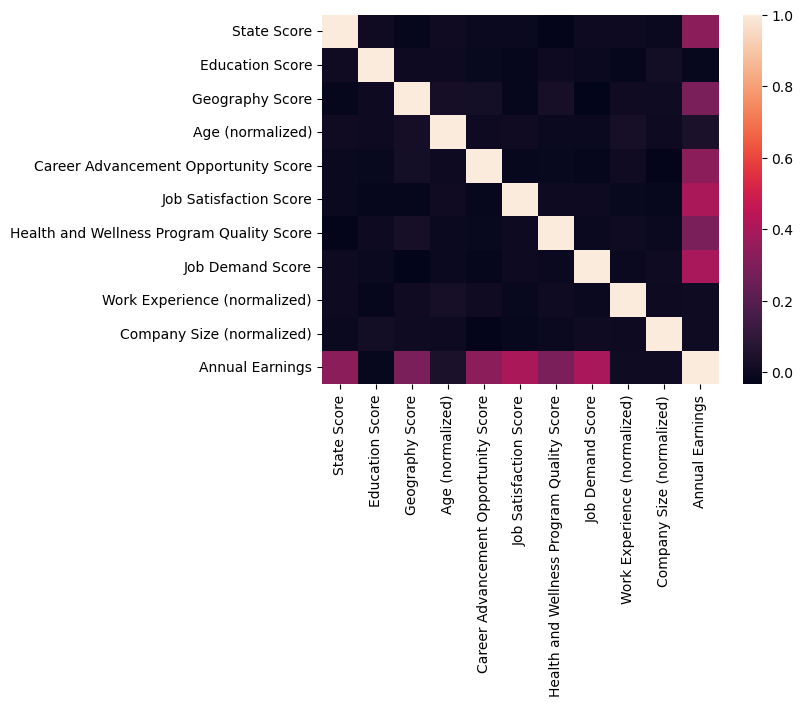

In [23]:
X_train = X_train.drop(columns=['FLAG_Education_Score'])
X_test = X_test.drop(columns=['FLAG_Education_Score'])

df = pd.concat([X_train, y_train], axis=1)

corr = df.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

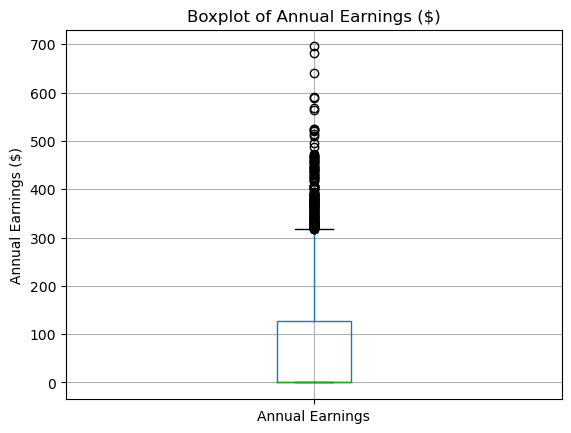

In [24]:
y_train.boxplot('Annual Earnings')
plt.ylabel('Annual Earnings ($)')
plt.title("Boxplot of Annual Earnings ($)")
plt.show()

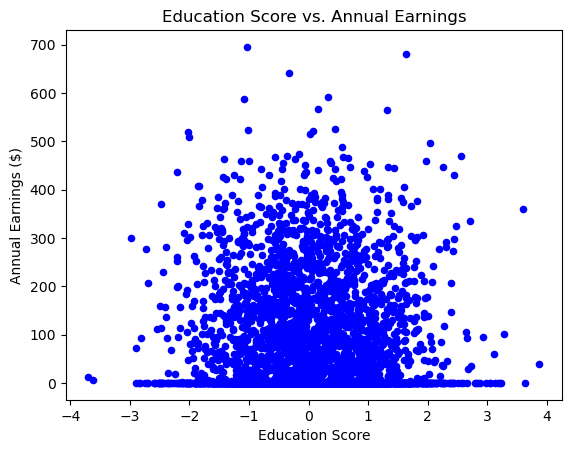

In [25]:
plot_data = X_train.copy()
plot_data['Annual Earnings'] = y_train.values

plot_data.plot.scatter(x='Education Score', y='Annual Earnings', color='blue')
plt.xlabel("Education Score")
plt.ylabel("Annual Earnings ($)")
plt.title("Education Score vs. Annual Earnings")
plt.show()

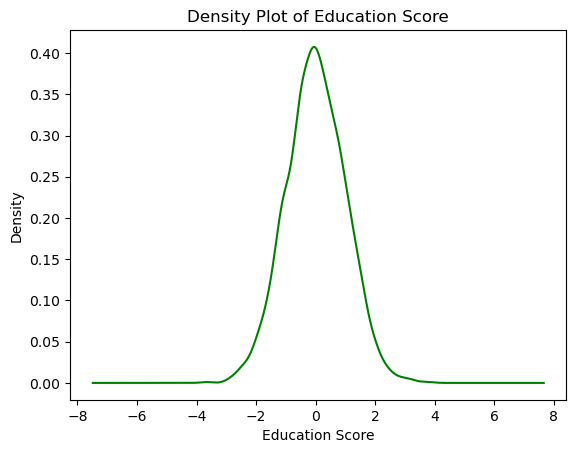

In [26]:
X_train['Education Score'].plot.density(color='green')
plt.xlabel('Education Score')
plt.title('Density Plot of Education Score')
plt.show()

# Q5. Subset columns for X
Use every column in `X` except 'State Score' to build your model.

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [27]:
X_train = X_train.drop('State Score', axis=1)
X_train.head()

,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
2768,-0.578401,0.822373,-0.491567,-1.041920,0.483266,0.011043,0.684851,0.326869,1.609581
1838,0.123641,-0.594391,-0.065382,-0.352254,0.872039,1.539660,0.076103,0.271305,-1.211328
2992,1.294321,0.061651,-0.126977,-1.016084,0.539455,1.450082,-0.252395,0.599954,-0.726527
1416,1.328457,1.253119,1.367087,0.116159,-0.431614,-0.151810,0.804145,0.330454,-0.114935
3995,-0.869957,-0.650750,1.893696,1.102995,0.372214,0.182099,0.904566,1.948616,0.715928


In [28]:
X_test = X_test.drop('State Score', axis=1)
X_test.head()

,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
3078,-0.362183,1.249381,-1.142959,-0.288399,0.240744,0.819014,-0.597821,1.104677,-0.755116
1037,-0.637359,-0.912645,-0.064079,-0.611538,1.428190,1.197632,-0.073520,-0.184356,1.106622
4085,-1.153270,-1.210359,1.605440,-0.368375,1.045971,0.850966,1.542045,-0.772796,-0.029135
596,0.841019,0.661010,0.191523,2.502879,0.423596,-0.311090,-0.421962,-1.378429,-0.027582
4650,-1.825191,-1.061272,-0.773544,0.968562,-0.128617,0.285594,-1.112921,0.168927,0.632005


# Q6. Use fit_transform() from StandardScaler() on X_train. Use transform() to apply that StandardScaler() to X_test.


In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_trainarray)

X_test_scaled = scaler.transform(X_testarray)


# Q7. Fit a random forest regressor (or any other sklearn) model on X_train. Call your model object `clf`.

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [30]:
clf = RandomForestRegressor()

clf.fit(X_train_scaled, y_trainarray)

train_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

/Users/adamyeeter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [31]:
print("train R2 (clf):", r2_score(y_train, train_preds))
print("test R2 (clf):", r2_score(y_test, test_preds))

train R2 (clf): 0.9778491520780466
test R2 (clf): 0.8372406820260245


In [32]:
trainMAE_clf = mean_absolute_error(y_train, train_preds)
print("train MAE (clf):", trainMAE_clf)
testMAE_clf = mean_absolute_error(y_test, test_preds)
print("test MAE (clf):", testMAE_clf)

train MAE (clf): 10.897689782961333
test MAE (clf): 29.319151218871497


# Q8. Make two scatterplots of actual vs. predicted. One for train results, one for test results.
With nicely labeled title and axis (like we did in class).

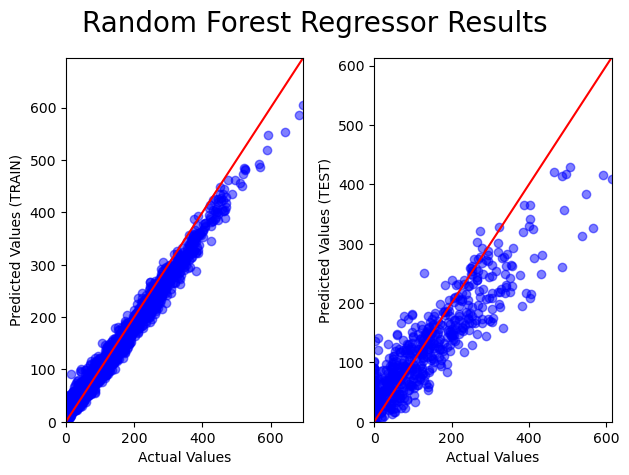

In [33]:
fig, axes = plt.subplots(1, 2)
fig.suptitle("Random Forest Regressor Results", fontsize=20)

axes[0].scatter(y_trainarray, train_preds, alpha=0.5, color='blue')
axes[0].set_xlabel("Actual Values", fontsize=10)
axes[0].set_ylabel("Predicted Values (TRAIN)", fontsize=10)
axes[0].set_xlim(y_trainarray.min(), y_trainarray.max())
axes[0].set_ylim(y_trainarray.min(), y_trainarray.max())
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(y_test, test_preds, alpha=0.5, color='blue')
axes[1].set_xlabel("Actual Values", fontsize=10)
axes[1].set_ylabel("Predicted Values (TEST)", fontsize=10)
axes[1].set_xlim(y_testarray.min(), y_testarray.max())
axes[1].set_ylim(y_testarray.min(), y_testarray.max())
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

# Q9. Try a simple model - does it work?

Examine variable importance and build a simpler model (you can use tree importance from random forest or permutation importance.) You are building a model with less features, so it should be as good or slightly less better than your current model.

* https://scikit-learn.org/stable/modules/permutation_importance.html
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Calculate error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

Were you able to get similar results?

In [34]:
importances = clf.feature_importances_
top_5_indices = importances.argsort()[-5:][::-1]
top_5_features = X_train.columns[top_5_indices]
top_5_features

Index(['Health and Wellness Program Quality Score',
       'Work Experience (normalized)', 'Education Score',
       'Job Satisfaction Score', 'Age (normalized)'],
      dtype='object')

In [35]:
X_train_simpler = X_train[top_5_features]
X_test_simpler = X_test[top_5_features]

simpler_clf = RandomForestRegressor()
simpler_clf.fit(X_train_simpler, y_train.values.ravel())

train_preds_simpler = simpler_clf.predict(X_train_simpler)
test_preds_simpler = simpler_clf.predict(X_test_simpler)

In [39]:
train_mae_simpler = mean_absolute_error(y_train, train_preds_simpler)
test_mae_simpler = mean_absolute_error(y_test, test_preds_simpler)
train_r2_simpler = r2_score(y_train, train_preds_simpler)
test_r2_simpler = r2_score(y_test, test_preds_simpler)

print(f"Simpler Model Train MAE: {train_mae_simpler}")
print(f"Simpler Model Train R2: {train_r2_simpler}")
print(f"Simpler Model Test MAE: {test_mae_simpler}")
print(f"Simpler Model Test R2: {test_r2_simpler}")

Simpler Model Train MAE: 27.01011412913201
Simpler Model Train R2: 0.8872933195515723
Simpler Model Test MAE: 71.92225995848604
Simpler Model Test R2: 0.20026166444529647


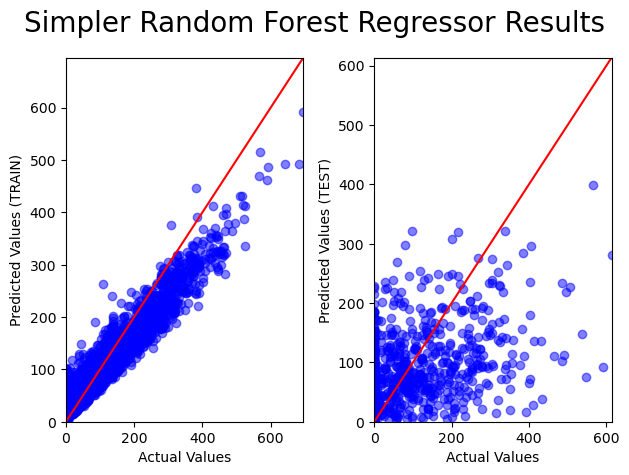

In [37]:
fig, axes = plt.subplots(1, 2)
fig.suptitle("Simpler Random Forest Regressor Results", fontsize=20)

axes[0].scatter(y_trainarray, train_preds_simpler, alpha=0.5, color='blue')
axes[0].set_xlabel("Actual Values", fontsize=10)
axes[0].set_ylabel("Predicted Values (TRAIN)", fontsize=10)
axes[0].set_xlim(y_trainarray.min(), y_trainarray.max())
axes[0].set_ylim(y_trainarray.min(), y_trainarray.max())
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(y_test, test_preds_simpler, alpha=0.5, color='blue')
axes[1].set_xlabel("Actual Values", fontsize=10)
axes[1].set_ylabel("Predicted Values (TEST)", fontsize=10)
axes[1].set_xlim(y_testarray.min(), y_testarray.max())
axes[1].set_ylim(y_testarray.min(), y_testarray.max())
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

I was not able to get similar results. My results in the original model were much better than in the simpler model.

# Q10. Five good bullets
Write five good bullets about what you learned in this assignment. Make sure comments on the shape of the data and the results of your experiments. Be quantitative and tell a story of what you saw!

*   I learned how to use feature importance in this assignment. I still need to learn more in order to get the most out of this
*   I learned how to run a random forest regressor model.
*   I learned how to mount my google drive and pull files from my google drive into google colaboratory.
*   I learned how to make scatterplots with labeled title and axis.
*   I learned how to work with two datasets at once (before this assignment I had mostly done work with just one dataset).








